In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [118]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combination
# np.random.uniform()method helps to return random values as arrays
# uniform()method returns random floating number between two specified numbers
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)

# Zipping the list(pairs elements from first list with elements from second list)
lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

593

# Perform API Calls

In [120]:
# Url
url = "http://api.openweathermap.org/data/2.5/weather?"
# temperature in Fahrenheit
units = "imperial"
# Building the base URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Print the log
print(f"Beginning Data Retrieval")
print("------------------------------")
counter = 0
#Intializing the list
name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloud=[]
speed=[]
country=[]
date=[]

# loop through the cities to retrieve the data
for city in cities:
    counter= counter+1
    response=requests.get(query_url+city).json()
# Handle Try and Exception
# Try to access key that doesn't exist
    try:
        if response["cod"]==200:
            name.append(city)
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
#             print(f"Proccessing Record {counter} of {city} ")
# "Catching" the error lets the rest of our code execute
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
#     except(KeyError)
#     print(f"Proccessing Record {counter} of {city} ")
#     pprint(response)

Beginning Data Retrieval
------------------------------


# Convert Raw Data to DataFrame

In [121]:
# Convert the raw data from the response into DataFrame
# Create Dictionary
city_dict = {"City":name,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Humidity":humidity,
            "Cloudiness":cloud,
            "Wind Speed":speed,
            "Country":country,
            "Date":date}
# Create DataFrame
city_data = pd.DataFrame(city_dict)
city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,36.99,78,0,10.36,US,1666272339
1,hermanus,-34.4187,19.2345,68.81,61,1,8.84,ZA,1666272384
2,qaanaaq,77.4840,-69.3632,1.96,67,60,13.62,GL,1666272385
3,sarab,38.6066,44.9883,79.92,22,100,16.11,IR,1666272385
4,vestmanna,62.1564,-7.1664,45.52,81,100,18.41,FO,1666272386
...,...,...,...,...,...,...,...,...,...
538,sobolevo,54.4299,31.8996,42.87,69,61,10.31,RU,1666272329
539,labuhan,-6.8844,112.2051,81.79,78,100,1.97,ID,1666272329
540,biak,-0.9131,122.8766,78.03,85,100,2.80,ID,1666272330
541,talavera de la reina,39.9635,-4.8308,63.79,66,100,19.51,ES,1666272330


In [122]:
# Writing the cities data to the CSV file
cities_csv= city_data[["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]]
cities_csv.to_csv(output_data_file,header=True)
                    

In [124]:
# Descriptive Statistics
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,19.996282,20.802282,62.286022,69.020258,57.745856,8.897624,1.666272e+09
std,33.769545,91.472350,20.116749,21.116562,40.407585,6.044845,1.159004e+02
min,-54.800000,-175.200000,-2.250000,5.000000,0.000000,0.000000,1.666272e+09
25%,-7.225850,-58.547200,47.220000,58.000000,13.000000,4.470000,1.666272e+09
50%,24.466700,23.716200,67.230000,73.000000,75.000000,8.050000,1.666272e+09
75%,48.911150,103.291350,78.780000,85.000000,100.000000,11.910000,1.666272e+09
max,78.218600,179.316700,99.140000,100.000000,100.000000,39.120000,1.666272e+09


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs

# Latitude vs. Temperature Plot

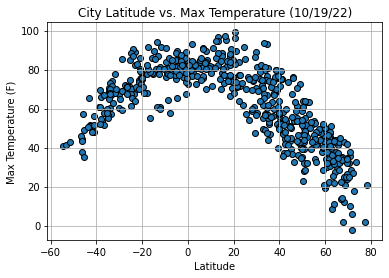

In [126]:
# Create a scatter plot for latitude vs Temperature
plt.scatter(city_data["Lat"],city_data["Max Temp"],marker='o',edgecolors="black")
plt.title("City Latitude vs. Max Temperature (10/19/22)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("Output_data/City_Lat_Max_Temp.png")

# Show Plot
plt.show()



# Latitude vs. Humidity Plot

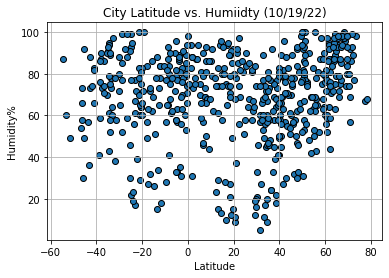

In [127]:
# Create a scatter plot for latitude vs Humidity
plt.scatter(city_data["Lat"],city_data["Humidity"],marker='o',edgecolors="black")
plt.title("City Latitude vs. Humiidty (10/19/22)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity%")

# Save the figure
plt.savefig("Output_data/City_Lat_Humidity.png")

# Show Plot
plt.show()


# Latitude vs. Cloudiness Plot

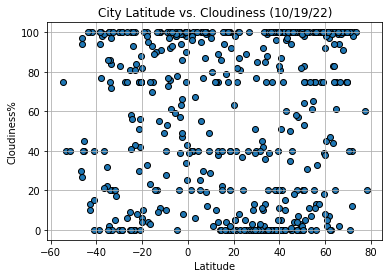

In [128]:
# Create a scatter plot for latitude vs Cloudiness
plt.scatter(city_data["Lat"],city_data["Cloudiness"],marker='o',edgecolors="black")
plt.title("City Latitude vs. Cloudiness (10/19/22)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")

# Save the figure
plt.savefig("Output_data/City_Lat_Cloudiness.png")

# Show Plot
plt.show()


# Latitude vs. Wind Speed Plot

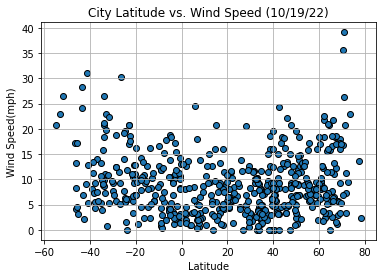

In [129]:
# Create a scatter plot for latitude vs Wind Speed
plt.scatter(city_data["Lat"],city_data["Wind Speed"],marker='o',edgecolors="black")
plt.title("City Latitude vs. Wind Speed (10/19/22)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Save the figure
plt.savefig("Output_data/City_Lat_WindSpeed.png")

# Show Plot
plt.show()


# Linear Regression

In [130]:
# Find the latitude values >=0 for Northern Hemisphere using loc
north_data = city_data.loc[city_data["Lat"]>=0][["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
north_data.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,42.0970,36.99,78,0,10.36
2,77.4840,1.96,67,60,13.62
3,38.6066,79.92,22,100,16.11
4,62.1564,45.52,81,100,18.41
5,22.0752,71.58,85,100,5.75


# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7388800475391494


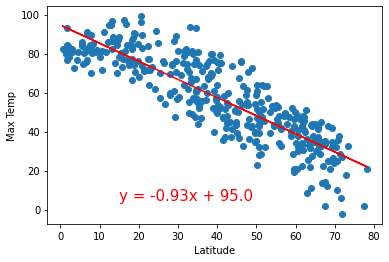

In [131]:
# Perform a linear regression on Maximum temperature vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Max Temp"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(15,5),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
# print(rvalue**2)
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [132]:
# Find the latitude <=0 for Southern Hemisphere using loc
south_data = city_data.loc[city_data["Lat"]<=0][["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
south_data.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
1,-34.4187,68.81,61,1,8.84
7,-46.2817,44.13,58,97,13.31
8,-24.7911,61.32,93,100,5.50
14,-42.8794,51.66,88,13,6.91
15,-23.1203,69.69,77,100,20.71


The r-value is 0.5725020075548526


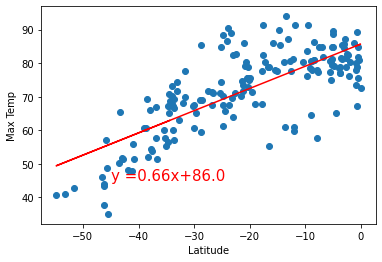

In [133]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Max Temp"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,45),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.05633590006476781


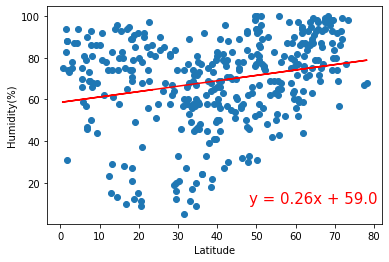

In [134]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Humidity"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(48,10),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.00016358652984764318


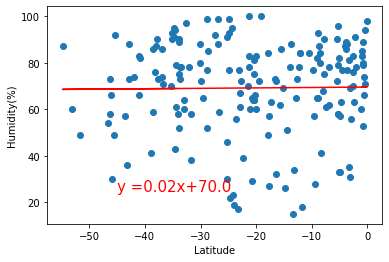

In [135]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Humidity"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,25),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.04449670144267049


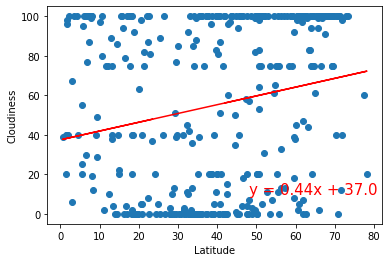

In [136]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(48,10),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.055329299869332584


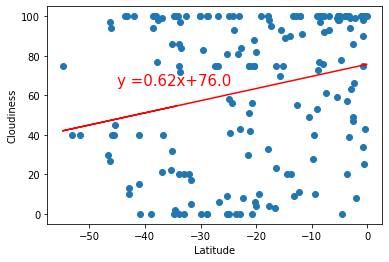

In [137]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,65),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.08536652088946664


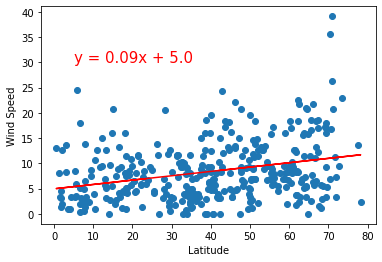

In [138]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(5,30),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.11096165557604085


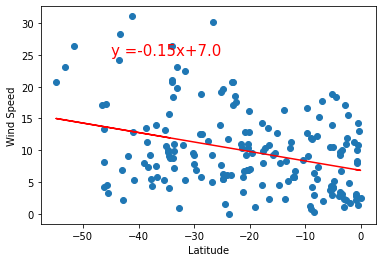

In [139]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,25),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()